## 4.1 Maps and Sets

### 4.1.1 Maps

- Collection of (key, value) pairs.
- Look up an element by its key and then get whatever is stored at its value.

### 4.1.2 Sets

- Collection with no order.
- All elements are unique.
- Maps are set based data structures.
- Keys in a map are a set.

### 4.1.3 Python Dictionaries

In Python, the map concept appears as a built-in data type called a [dictionary](https://docs.python.org/2/tutorial/datastructures.html#dictionaries). A dictionary contains key-value pairs. Some examples of setting up a dictionary:

Took hash function, get last numbers of input, devide into intended bucket, remainder will become the index
The last number are mostly randomly. If collision happens, we have linked list
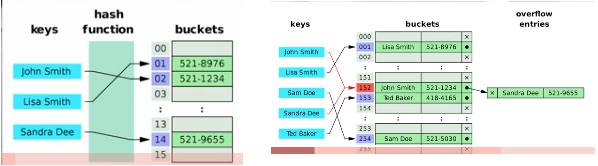

In [5]:
udacity = {}
udacity['u'] = 1
udacity['d'] = 2
udacity['a'] = 3
udacity['c'] = 4
udacity['i'] = 5
udacity['t'] = 6
udacity['y'] = 7

print ("udacity = ", udacity)
print ("udacity['t'] = ", udacity['t'])
print

dictionary = {}
dictionary['d'] = [1]
dictionary['i'] = [2]
dictionary['c'] = [3]
dictionary['t'] = [4]
dictionary['i'].append(5)
dictionary['o'] = [6]
dictionary['n'] = [7]
dictionary['a'] = [8]
dictionary['r'] = [9]
dictionary['y'] = [10]
print ("dictionary = ", dictionary)
print ("dictionary['i'] = ", dictionary['i'])

"""Time to play with Python dictionaries! You're going to work on a dictionary that
stores cities by country and continent. One is done for you - the city of Mountain 
View is in the USA, which is in North America.

You need to add the cities listed below by modifying the structure.
Then, you should print out the values specified by looking them up in the structure.

Cities to add:
Bangalore (India, Asia)
Atlanta (USA, North America)
Cairo (Egypt, Africa)
Shanghai (China, Asia)"""

locations = {}
locations = {'North America': {'USA': ['Mountain View']}}
locations['Asia'] = {'India': ['Bangalore']}
locations['North America']['USA'].append('Atlanta')
locations['Africa'] = {'Egypt': ['Cairo']}
locations['Asia']['China'] = ['Shanghai']

""" 
Print the following (using "print").
1. A list of all cities in the USA in alphabetic order.
2. All cities in Asia, in alphabetic order, next to the name of the country.
In your output, label each answer with a number so it looks like this:
1
American City
American City
2
Asian City - Country
Asian City - Country
"""

print("1\n", locations)
for city in sorted(locations['North America']['USA']):
    print (city)

print("2")
city_countries = []
for country, cities in locations['Asia'].items():
    for city in cities:
        city_countries.append(city + " - " + country)
for city_country in sorted(city_countries):
    print (city_country)

udacity =  {'u': 1, 'd': 2, 'a': 3, 'c': 4, 'i': 5, 't': 6, 'y': 7}
udacity['t'] =  6
dictionary =  {'d': [1], 'i': [2, 5], 'c': [3], 't': [4], 'o': [6], 'n': [7], 'a': [8], 'r': [9], 'y': [10]}
dictionary['i'] =  [2, 5]
1
 {'North America': {'USA': ['Mountain View', 'Atlanta']}, 'Asia': {'India': ['Bangalore'], 'China': ['Shanghai']}, 'Africa': {'Egypt': ['Cairo']}}
Atlanta
Mountain View
2
Bangalore - India
Shanghai - China


## 4.2 Hashing

- Data structures that employ hash functions allow you to look up data in constant time i.e. **search = O(1)**.
- For all the data structures we've looked at so far look-ups are linear in time.
  - Stacks and Queues can find the newest and oldest values in constant time.
  - Priority Queues can find the hihest priority item in constant time.
  - For a general item finding it will mean looking through every item, hence constant time.
 
### 4.2.1 Hash Functions

- Hash functions convert values into hashed values that can be stored and retrieved easily.
- The hased value is essentially a coded version of the value that's often the index of the array.
- Hash functions essentially map values to indices.

A common pattern for hash functions is to take the value (or the last few digits of the value if it's a very large number), divide it by a consistent denominator and use the remainder as the hashed vaue (index), i.e.

    index = value MOD denominator.

For large values, we use the last few digits because these are the most random since values tend to be assigned in order.

### 4.2.2 Collisions

When the hashed value is the same for two different values you have a collision; there are a few ways to deal with this:

1. Change the denominator in your hash function or change the hash function completely so that each value has a unique hashed value.
   - If this is done reactively as new values appear and collisions happen, creating arrays and moving data around can be expensive and will increase the coplexity in space and time of your look-ups.
   - If you use too large a denominator in your hash function you can end up with a sparse hash table which takes up a lot of space.
2. Can keep a list of values for each hashed value, these are called buckets.
   - Done well, the values will be uniformly spread across the buckets with each bucket containing ideally exactly one value (although between one and three values is still good).
   - Done badly one could end up with, at worst, all the values in one bucket resulting in no improvement in look-up time over linear.
3. Can compose different hash functions, i.e. split your buckets using another hash function.
   - This works well if your data is uniformly spread out across large buckets.

### 4.2.3 Load Factor

In choosing a hash function, often there is a trade-off between complexity in time and space. One can use hashed value buckets with multiple values in each which and take a longer to find the value or use a sparse hash table so each hashed value corresponds to no more than one value but the table is large and takes up a lot of space. As a measure of where on the scale a particular hash table lies, we define a "load factor":

    Load Factor = Number of Entries / Number of Buckets.

The purpose of a load factor is to give us a sense of how "full" a hash table is. For example, if we're trying to store 10 values in a hash table with 1000 buckets, the load factor would be 0.01, and the majority of buckets in the table will be empty. We end up wasting memory by having so many empty buckets, so we may want to rehash, or come up with a new hash function with less buckets. We can use our load factor as an indicator for when to rehash—as the load factor approaches 0, the more empty, or sparse, our hash table is. 

On the flip side, the closer our load factor is to one (meaning the number of values equals the number of buckets), the better it would be for us to rehash and add more buckets. Any table with a load value greater than 1 is guaranteed to have collisions.


#### Exercise: Load Factor

A coworker comes to you with a hash function that divides an group of values by 100, and uses the remainder as a key. The values are 100 numbers that all multiples of 5. He thinks the function is running slow.

**Q1.** What is the load factor?

**A1.** The load factor is one since there are both 100 values and 100 buckets.

**Q2.** What number would you recommend his function to divide by rather than 100?

    a) 87,
    b) 107,
    c) 125,
    d) 1001.

**A2.** Lets assume our values are all large than zero. The smallest values they could be are 5, 10, 15,..., 500. 

    c) 125 is a bad choice this would lead to a lot of collisions since it is also a multiple of 5 (125, 250, 375, 500,... would all have the same hash values for example).
    a) 87 is prime so decent 5*87 = 435 so we would still definitely have collisions (5 and 440 would have the same hash value for example).
    b) 107 is also prime and 5*107 = 535 so if the numbers are between 5 and 500 we are guaranted no collisions.
    c) 1001 is prime and would guarantee no collisions in all the cases that 107 would and more but would result in a much larger hash table.

### 4.2.4 Hash Maps

- Hash maps are one of the main places we see hash functions show up.
- Until now we have been using hash functions as a way to find keys.
- Maps have keys and values and the keys are unique.
- You can use the key as an input to a hash function, then store the key value pair in the bucket of the hash value produced by the function.

### 4.2.5 String Keys

- Strings can be used as keys, we just need a hash function that converts letters into numbers.
- Letters can be converted to ASCII values (A=65, B=66, C=67,...) using inbuilt function in most languages.
- We can combine the ASCII values for each letter with the hash function.

#### What should the hash function look like?

- There are trade-offs.
- Should each word have it's own bucket?
- Is it okay to have some collisions if the hash function is simpler?
- For <=30 values, one can just use the ASCII values for the first letter.

#### Example: Java Hash Function

The standard hash code function for string keys in java prefers having a large hash table over having any collisions. The function looks like:

    HashFunction(s, n) = s[0]*31^(n-1) + s[1]*31^(n-2) + ... + s[n-1],
  
where we use the first n letters of the string s to hash it. s[i] is the ASCII value of the letter with index i in the string s. This formula gives a hash value that is unique to our string.

Common characters have ASCII values between 32 and 126. By multiplying the ASCII values for each letter by a power of  31, we can guarantee that every number representation (hash value) will be unique to that string. This is great for a dictionary where we need unique buckets for each string but strings with just 3/4 letters already have huge values so it takes up a lot of space.

More complex hash functions have been discovered since, now 31 is more of a convention than the best value

#### Implementation of a Hash Table

Write a own hash table and hash function that uses string keys. Your table will store strings in buckets by their first two letters, according to the formula below:

    Hash Value = (ASCII Value of First Letter * 100) + ASCII Value of Second Letter.

Assume that the string will have at least two letters, and the first two characters are uppercase letters (ASCII values from 65 to 90). You can use the Python function ord() to get the ASCII value of a letter, and chr() to get the letter associated with an ASCII value. 

Create a HashTable class, methods to store and lookup values, and a helper function to calculate a hash value given a string. You cannot use a Python dictionary—only lists! And remember to store lists at each bucket, and not just the string itself. For example, you can store "UDACITY" at index 8568 as ["UDACITY"].

In [11]:
"""
Write a HashTable class that stores strings in a hash table, where keys are calculated
using the first two letters of the string.
"""

class HashTable(object):
    def __init__(self):
        # Assume that the string will have at least two letters,
        # and the first two characters are uppercase letters (i.e. ASCII values from 65 to 90)
        # => max index value = 90*100 + 90 = 9090
        self.table = [None]*9090

    def store(self, string):
        """Input a string that's stored in the table."""
        index = self.calculate_hash_value(string)
        if not(self.table[index]):
            self.table[index] = [string]
        elif not(string in self.table[index]):
            self.table[index].append(string)

    def lookup(self, string):
        """Return the hash value if the string is already in the table.
        Return -1 otherwise."""
        index = self.calculate_hash_value(string)
        if self.table[index] and string in self.table[index]:
            return index
        else:
            return -1

    def calculate_hash_value(self, string):
        """Helper function to calulate a hash value from a string."""
        return ord(string[0])*100 + ord(string[1])
    
# Setup
hash_table = HashTable()

# Test calculate_hash_value
print ("Should print 8568: ", hash_table.calculate_hash_value('UDACITY'))

# Test lookup edge case
print ("Should print -1: ", hash_table.lookup('UDACITY'))

# Test store
hash_table.store('UDACITY')
print ("Should print 8568: ", hash_table.lookup('UDACITY'))

# Test store edge case
hash_table.store('UDACIOUS')
print ("Should print 8568: ", hash_table.lookup('UDACIOUS') )

Should print 8568:  8568
Should print -1:  -1
Should print 8568:  8568
Should print 8568:  8568
